In [1]:
#Se importan las librerias necesaras

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.api import add_constant
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pystan

pd.set_option('display.max_columns', None) # para ver todas las columnas

In [2]:
stars = pd.read_csv("stellar.csv")

In [3]:
col = 'clase'
print(stars[col].unique())

['MS' 'PMS']


In [4]:
stars = stars[stars.clase != 'PMS']

In [5]:
cols = ['M','eM1','eM2','R','eR1','eR2','Teff','eTeff1', 'eTeff2','L','eL1','eL2','Meta','eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho', 'erho1', 'erho2','clase']

In [6]:
stars = stars[cols]

In [7]:
stars.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,NaN,NaN,NaN,4.137,0.023,0.023,NaN,NaN,NaN,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,NaN,NaN,NaN,3.850,0.004,0.004,NaN,NaN,NaN,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,NaN,NaN,NaN,3.580,0.004,0.004,NaN,NaN,NaN,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.14,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.24,0.04,0.04,4.306,0.004,0.004,NaN,NaN,NaN,MS


In [8]:
nulls = stars.isnull().sum(axis = 0)

In [9]:
nulls

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L           7
eL1         7
eL2         7
Meta      197
eMeta1    197
eMeta2    197
logg       68
elogg1     68
elogg2     68
rho       274
erho1     274
erho2     274
clase       0
dtype: int64

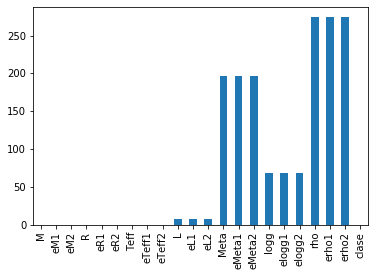

In [10]:
nulls.plot(kind='bar')

In [11]:
print('El porcentaje de NaNs en L es:', round(17*100/726,2), '%')
print('El porcentaje de NaNs en Meta es:', round(216*100/726,2), '%')
print('El porcentaje de NaNs en logg es:', round(94*100/726,2), '%')
print('El porcentaje de NaNs en rho es:', round(304*100/726,2), '%')

El porcentaje de NaNs en L es: 2.34 %
El porcentaje de NaNs en Meta es: 29.75 %
El porcentaje de NaNs en logg es: 12.95 %
El porcentaje de NaNs en rho es: 41.87 %


In [12]:
stars_drop_DS1 = stars.dropna()

In [13]:
stars_drop_DS1.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,0.220865,0.010653,0.010653,MS
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,0.144876,0.007102,0.007102,MS
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,0.243591,0.012073,0.012073,MS
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,0.170442,0.008522,0.008522,MS
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,0.350117,0.017044,0.017044,MS
295,1.08,0.05,0.05,1.41,0.02,0.02,5705,78,78,2.374,0.207374,0.207374,0.38,0.08,0.08,4.172,0.013,0.013,0.385626,0.017044,0.017044,MS
296,1.17,0.04,0.04,1.37,0.03,0.03,6199,65,65,3.635,0.304111,0.304111,-0.13,0.08,0.08,4.228,0.014,0.014,0.450252,0.021305,0.021305,MS
297,1.22,0.05,0.05,1.83,0.04,0.04,6381,71,71,6.112,0.478281,0.478281,-0.13,0.11,0.11,4.000,0.014,0.014,0.199560,0.008522,0.008522,MS
298,1.44,0.05,0.05,2.45,0.05,0.05,6225,71,71,6.714,0.596777,0.596777,0.10,0.08,0.08,3.817,0.012,0.012,0.097294,0.004261,0.004261,MS
300,1.15,0.04,0.04,1.79,0.04,0.04,6082,65,65,4.372,0.372936,0.372936,-0.24,0.08,0.08,3.990,0.012,0.012,0.199560,0.007812,0.007812,MS


## Tratamiento del set de datos DS1

Debido a como se ha observado anteriormente en la tabla de datos, cada variable cuenta con dos errores asociados a su observación. A continuación, se pretende crear una única variable de error por feature, promediando su valor por cada fila.

In [14]:
#error M eM_avg
column_list = ['eM1','eM2']
stars_drop_DS1["eM_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error R eR_avg
column_list = ['eR1','eR2']
stars_drop_DS1["eR_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error Teff eTeff_avg
column_list = ['eTeff1','eTeff2']
stars_drop_DS1["eTeff_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error L el_avg
column_list = ['eL1','eL2']
stars_drop_DS1["eL_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error Meta eMeta_avg
column_list = ['eMeta1','eMeta2']
stars_drop_DS1["eMeta_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error logg elogg_avg
column_list = ['elogg1','elogg2']
stars_drop_DS1["elogg_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#error rho eR_avg
column_list = ['erho1','erho2']
stars_drop_DS1["erho_avg"] = stars_drop_DS1[column_list].sum(axis=1)

#Promediado del error
stars_drop_DS1[('eM_avg')] = stars_drop_DS1['eM_avg'] / 2
stars_drop_DS1['eR_avg'] = stars_drop_DS1['eR_avg'] / 2
stars_drop_DS1['eTeff_avg'] = stars_drop_DS1['eTeff_avg'] / 2
stars_drop_DS1['eL_avg'] = stars_drop_DS1['eL_avg'] / 2
stars_drop_DS1['eMeta_avg'] = stars_drop_DS1['eMeta_avg'] / 2
stars_drop_DS1['elogg_avg'] = stars_drop_DS1['elogg_avg'] / 2
stars_drop_DS1['erho_avg'] = stars_drop_DS1['erho_avg'] / 2

#Se muestra la nueva tabla con los errores promediados por fila
stars_drop_DS1.head()

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase,eM_avg,eR_avg,eTeff_avg,eL_avg,eMeta_avg,elogg_avg,erho_avg
290,1.15,0.04,0.04,1.73,0.04,0.04,5718,71,71,2.700,0.342212,0.342212,0.21,0.08,0.08,4.018,0.013,0.013,0.220865,0.010653,0.010653,MS,0.04,0.04,71.0,0.342212,0.08,0.013,0.010653
291,1.30,0.05,0.05,2.08,0.05,0.05,6251,78,78,6.664,0.597819,0.597819,-0.02,0.08,0.08,3.916,0.013,0.013,0.144876,0.007102,0.007102,MS,0.05,0.05,78.0,0.597819,0.08,0.013,0.007102
292,1.29,0.08,0.08,1.74,0.05,0.05,6420,71,71,4.555,0.353974,0.353974,-0.07,0.11,0.11,4.063,0.016,0.016,0.243591,0.012073,0.012073,MS,0.08,0.05,71.0,0.353974,0.11,0.016,0.012073
293,1.14,0.05,0.05,1.88,0.03,0.03,5926,78,78,4.119,0.374560,0.374560,-0.02,0.11,0.11,3.945,0.014,0.014,0.170442,0.008522,0.008522,MS,0.05,0.03,78.0,0.374560,0.11,0.014,0.008522
294,1.18,0.07,0.07,1.50,0.04,0.04,6316,78,78,3.422,0.297267,0.297267,-0.07,0.08,0.08,4.157,0.015,0.015,0.350117,0.017044,0.017044,MS,0.07,0.04,78.0,0.297267,0.08,0.015,0.017044


### Set de datos DS1 como base

In [15]:
df_DS1 = stars_drop_DS1.drop(['eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'eL1','eL2', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 'erho1', 
                                'erho2', 'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg','eMeta_avg', 'elogg_avg', 'erho_avg'], axis='columns')

df_DS1.head()

,M,R,Teff,L,Meta,logg,rho,clase
290,1.15,1.73,5718,2.700,0.21,4.018,0.220865,MS
291,1.30,2.08,6251,6.664,-0.02,3.916,0.144876,MS
292,1.29,1.74,6420,4.555,-0.07,4.063,0.243591,MS
293,1.14,1.88,5926,4.119,-0.02,3.945,0.170442,MS
294,1.18,1.50,6316,3.422,-0.07,4.157,0.350117,MS


<Figure size 800x640 with 0 Axes>

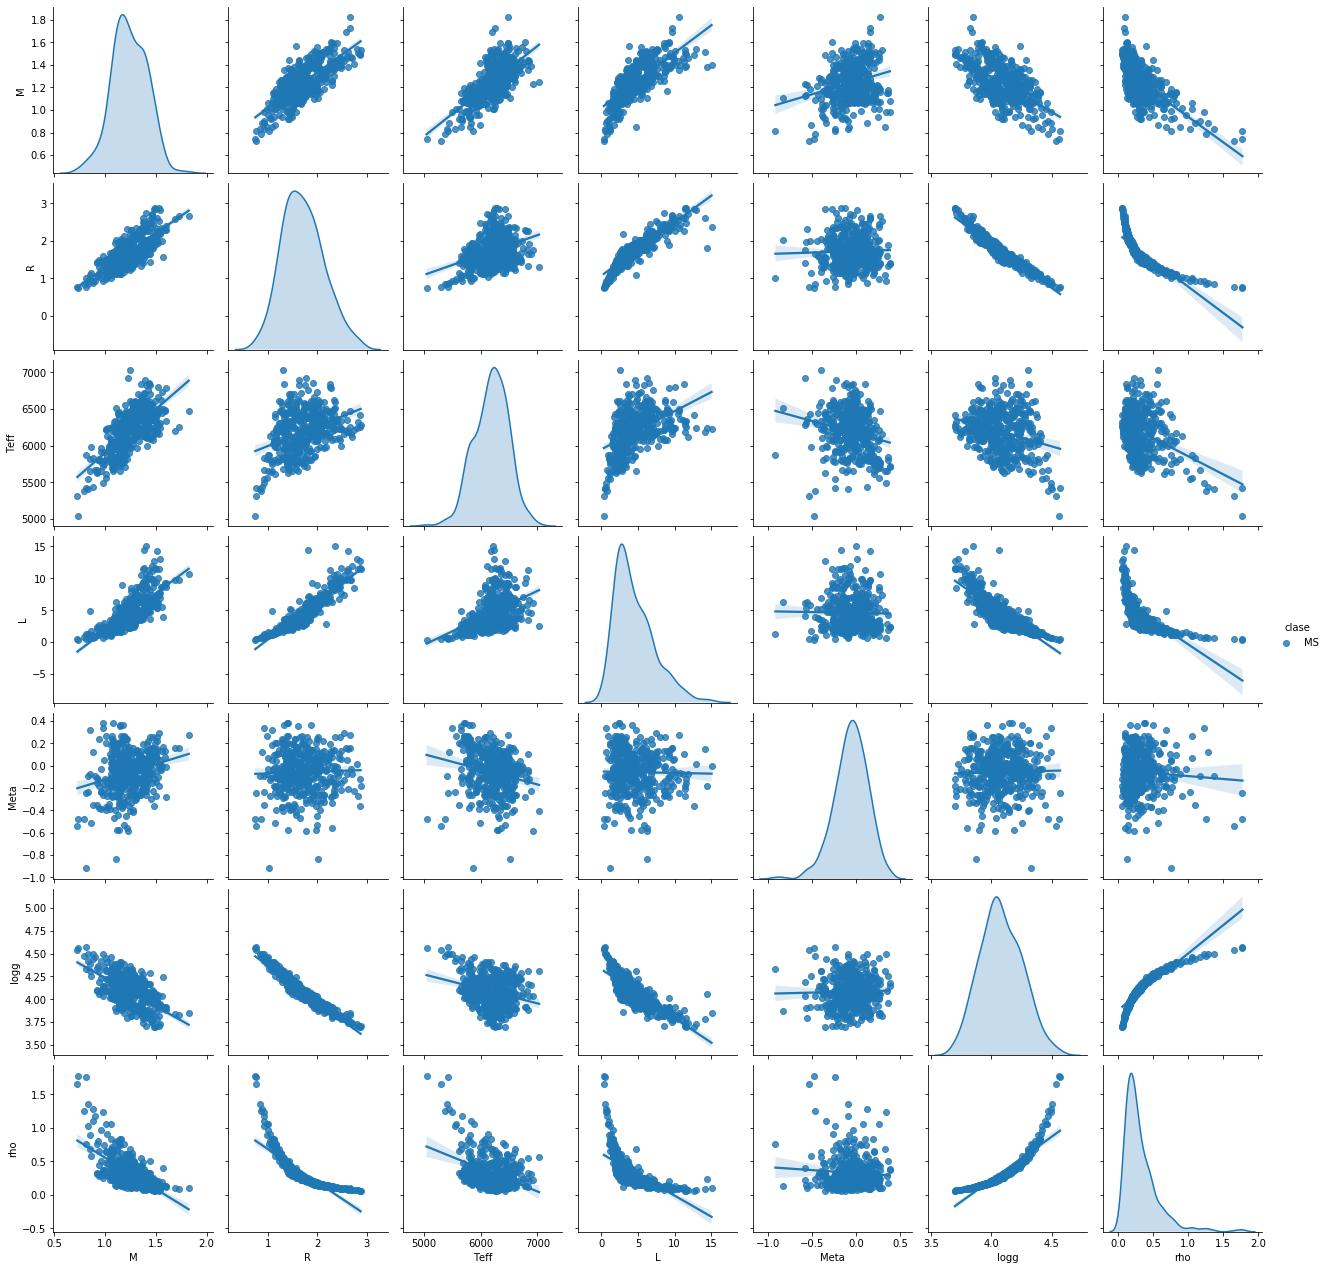

In [16]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_DS1, kind="reg", hue="clase")
#sns.pairplot(df_DS1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [17]:
#Procesamiento de los datos para su utilizacion
data_frame = dict(stars_drop_DS1)

In [18]:
#Se preparan los datos para el modelo de Stan
data = {}
data['obs_L'] = np.array(data_frame['L'])
data['err_L'] = np.array(data_frame['eL_avg'])

data['obs_Teff'] = np.array(data_frame['Teff'])
data['err_Teff'] = np.array(data_frame['eTeff_avg'])

data['obs_Meta'] = np.array(data_frame['Meta'])
data['err_Meta'] = np.array(data_frame['eMeta_avg'])

data['obs_logg'] = np.array(data_frame['logg'])
data['err_logg'] = np.array(data_frame['elogg_avg'])

data['obs_rho'] = np.array(data_frame['rho'])
data['err_rho'] = np.array(data_frame['erho_avg'])

data['obs_M'] = np.array(data_frame['M']) 
data['err_M'] = np.array(data_frame['eM_avg']) 
data['N'] = len(data['obs_L'])

In [19]:
# Stan Gaussian model 
stan_code=""" 
data{ 
    int<lower=0> N;             # numero de puntos
    vector[N] obs_Teff;         # obs de Teff    
    vector[N] obs_L;            # obs de L
    vector[N] obs_Meta;         # obs de Meta
    vector[N] obs_logg;         # obs de logg
    vector[N] obs_rho;          # obs de rho
    vector<lower=0>[N] err_Teff;   # error en la medicion de Teff    
    vector<lower=0>[N] err_L;   # error en la medicion de L
    vector<lower=0>[N] err_Meta;   # error en la medicion de Meta
    vector<lower=0>[N] err_logg;   # error en la medicion de logg
    vector<lower=0>[N] err_rho;    # error en la medicion de rho
    vector[N] obs_M;            # obs de la masa 
    vector<lower=0>[N] err_M;   # error en la medicion de M 
} 
parameters{ 
    real alpha;                 # intercepcion
    real beta1;                 # coeficiente de L
    real beta2;                 # coeficiente de Teff
    real beta3;                 # coeficiente de Meta
    real beta4;                 # coeficiente de logg
    real beta5;                 # coeficiente de rho
    real<lower=0> epsilon;      # scatter around true black hole mass 
    vector[N] x1;               # Verdaderos valores de L
    vector[N] x2;               # Verdaderos valores de Teff
    vector[N] x3;               # Verdaderos valores de Meta
    vector[N] x4;               # Verdaderos valores de logg
    vector[N] x5;               # Verdaderos valores de rho
    vector[N] y;                # Verdaderos valores de M 
} 
  model{ 
    # likelihood and priors 
    alpha ~ normal(0, 1000); 
    beta1 ~ normal(0, 1000);
    beta2 ~ normal(0, 1000); 
    beta3 ~ normal(0, 1000); 
    beta4 ~ normal(0, 1000); 
    beta5 ~ normal(0, 1000); 
    epsilon ~ gamma(0.001, 0.001); 
       for (i in 1:N){ 
        x1[i] ~ normal(0, 1000);
        x2[i] ~ normal(0, 1000);
        x3[i] ~ normal(0, 1000);
        x4[i] ~ normal(0, 1000);
        x5[i] ~ normal(0, 1000);
        y[i] ~ normal(0, 1000); 
    } 
      obs_Teff ~ normal(x1, err_Teff); 
      obs_L ~ normal(x2, err_L);
      obs_Meta ~ normal(x3, err_Meta);
      obs_logg ~ normal(x4, err_logg);
      obs_rho ~ normal(x5, err_rho);
    y ~ normal(alpha + beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 * x4 + beta5 * x5, epsilon); 
    obs_M ~ normal(y, err_M); 
} 
"""

In [20]:
# Run mcmc 
fit = pystan.stan(model_code=stan_code, data=data, iter=15000, chains=3, 
                warmup=5000, thin=10, n_jobs=3) 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3dd632c108c7d5883ee3355890b65dc0 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [24]:
def save(obj, filename):
    """Save compiled models for reuse."""
    import pickle
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

def load(filename):
    """Reload compiled models for reuse."""
    import pickle
    return pickle.load(open(filename, 'rb'))

In [23]:
save(fit, 'model_dropnan.pic')

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  """


In [23]:
new_model = load('model_dropnan.pic')

ModuleNotFoundError: No module named 'stanfit4anon_model_3dd632c108c7d5883ee3355890b65dc0_2145995486421544523'

In [21]:
pystan.experimental.unpickle_fit('output_all.txt', module_name="stanfit4anon_model_29fef7469510d8c5b4085b6c92003df1_9201068612674835575")

AttributeError: module 'pystan' has no attribute 'experimental'

### Analis de los resultados

In [22]:
import arviz as az

In [23]:
nlines = 12

output = str(fit).split('\n') 
for item in output[:nlines]: 
    print(item)

Inference for Stan model: anon_model_3dd632c108c7d5883ee3355890b65dc0.
3 chains, each with iter=15000; warmup=5000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    -2.83    0.13   0.24  -3.33   -3.0  -2.83  -2.65  -2.48      3   1.64
beta1   8.2e-7  2.0e-6 2.8e-6-3.9e-6-1.4e-6 6.6e-7 3.1e-6 5.7e-6      2   2.26
beta2     0.08  1.9e-3 3.7e-3   0.08   0.08   0.08   0.08   0.09      4   1.46
beta3     0.19  4.1e-3   0.02   0.15   0.17   0.19    0.2   0.23     22   1.12
beta4     0.95    0.03   0.06   0.86    0.9   0.94   0.99   1.06      3   1.66
beta5    -0.44  4.9e-3   0.02  -0.48  -0.45  -0.44  -0.42   -0.4     17   1.11
epsilon   0.04  8.1e-4 3.5e-3   0.03   0.04   0.04   0.04   0.05     19   1.07


Se va a convertir el fit en un diccionario para ser mas facil tratado

In [24]:
fit_df = fit.to_dataframe()

In [25]:
az_data = az.from_pystan(
                posterior=fit,
                posterior_predictive='y',
                observed_data=['obs_M'],
             )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5FEF07E08>],
      dtype=object)

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


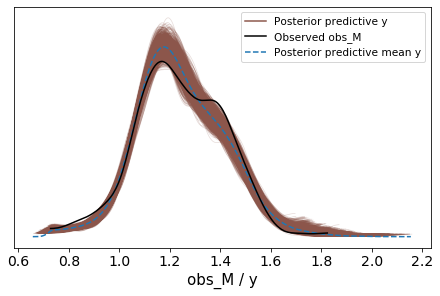

In [26]:
az.plot_ppc(az_data, data_pairs = {'obs_M' : 'y'})

In [27]:
la = fit.extract(permuted=True)

In [28]:
from sklearn import preprocessing, metrics, linear_model
bay_test_mse = metrics.mean_squared_error(stars_drop_DS1.M, la['y'].mean(0))
print('Bayes Test MSE:', bay_test_mse)

Bayes Test MSE: 0.0033215612134034596


In [29]:
from sklearn.metrics import r2_score
r2_Score_Bayes = r2_score(stars_drop_DS1.M, la['y'].mean(0))
print(r2_Score_Bayes)

0.8885944797254595


In [30]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(stars_drop_DS1.M, la['y'].mean(0))
print(MAE)

0.036763238913886685


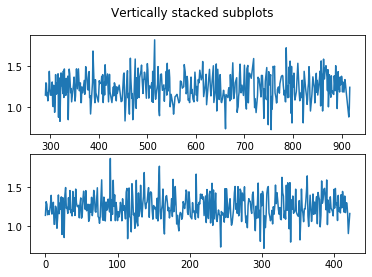

In [31]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(stars_drop_DS1.M)
axs[1].plot(la['y'].mean(0))

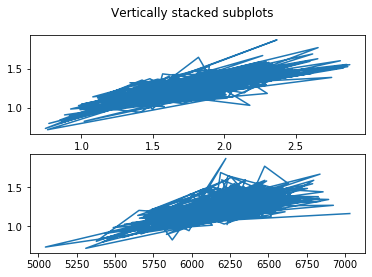

In [32]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_DS1.R, la['y'].mean(0))
axs[1].plot(df_DS1.Teff, la['y'].mean(0))


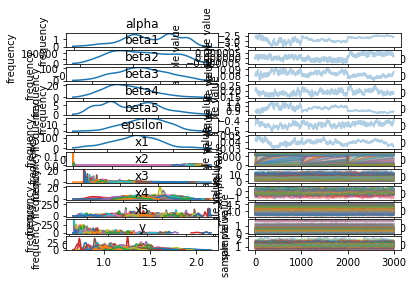

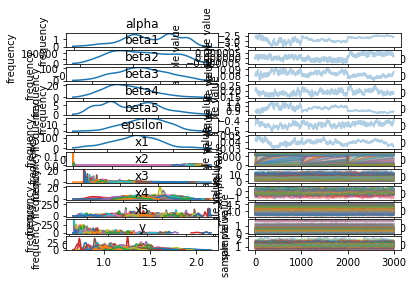

In [33]:
fit.traceplot()

Text(0.5, 1.0, 'Original R vs Predicted M')

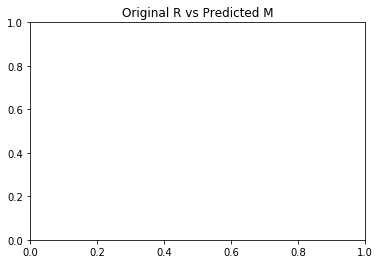

In [39]:
plt.title('Original R vs Predicted M')

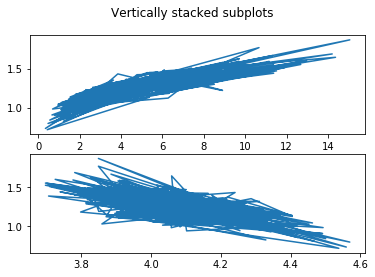

In [40]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_DS1.L, la['y'].mean(0))
axs[1].plot(df_DS1.logg, la['y'].mean(0))

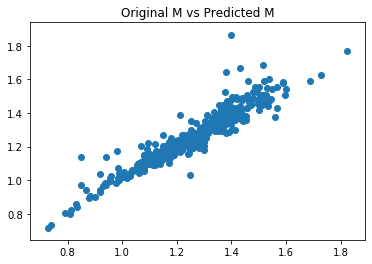

In [35]:
plt.title('Original M vs Predicted M')
plt.scatter(df_DS1.M, la['y'].mean(0))

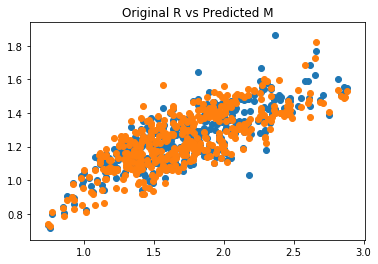

In [36]:
plt.title('Original R vs Predicted M')
plt.scatter(df_DS1.R, la['y'].mean(0))
plt.scatter(df_DS1.R, df_DS1.M)

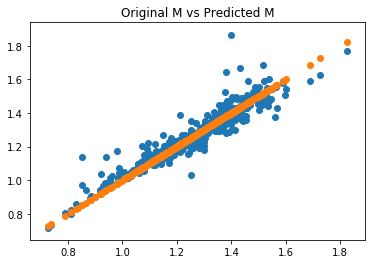

In [38]:
plt.title('Original M vs Predicted M')
plt.scatter(df_DS1.M, la['y'].mean(0))
plt.scatter(df_DS1.M, df_DS1.M)

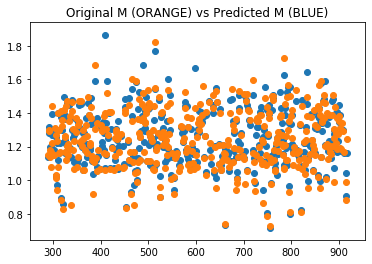

In [53]:
plt.title('Original M (ORANGE) vs Predicted M (BLUE)')
plt.scatter(df_DS1.index ,la['y'].mean(0))
plt.scatter(df_DS1.index, df_DS1.M)